In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
CO_2018 = pd.read_excel('../data/raw/2018CO.xls')

In [3]:
CO_2018.shape

(8760, 33)

In [4]:
def int_to_hour(num):
    if num < 10:
        return '0{}:00:00'.format(num)
    else:
        return '{}:00:00'.format(num)

In [5]:
CO_2018['HORA'] = CO_2018['HORA'].apply(lambda x:int_to_hour(x-1))

In [6]:
CO_2018['DATETIME'] = pd.to_datetime(CO_2018['FECHA'].astype(str) +' ' + CO_2018['HORA'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
CO_2018.set_index('DATETIME', inplace = True)

In [8]:
CO_2018 = CO_2018.drop(['FECHA','HORA'],axis = 1)

In [9]:
CO_2018.asfreq('D').head()

,ACO,AJM,ATI,BJU,CAM,CCA,CHO,CUA,CUT,FAC,...,SAG,SFE,SJA,TAH,TLA,TLI,UAX,UIZ,VIF,XAL
DATETIME,,,,,,,,,,,,,,,,,,,,,
2018-01-01,0.4,0.8,0.8,0.6,-99.0,0.7,-99.0,0.5,-99,0.3,...,0.6,0.6,-99,1.5,0.4,1.1,-99.0,1.2,0.6,0.4
2018-01-02,0.2,0.4,0.1,0.3,-99.0,0.1,-99.0,0.1,-99,0.1,...,0.2,0.2,-99,0.1,0.0,0.2,-99.0,0.3,0.3,0.3
2018-01-03,0.6,0.3,0.4,0.9,-99.0,0.4,-99.0,0.1,-99,0.5,...,0.8,0.3,-99,0.6,0.6,0.9,-99.0,0.9,0.9,0.9
2018-01-04,0.2,0.3,0.2,0.7,-99.0,0.4,-99.0,0.2,-99,0.3,...,0.3,0.2,-99,0.4,0.1,0.5,-99.0,0.7,0.3,0.8
2018-01-05,0.3,0.3,0.3,1.0,-99.0,0.6,-99.0,0.2,-99,0.5,...,0.5,0.3,-99,0.6,0.4,1.0,-99.0,0.9,0.5,1.0


In [105]:
CO_2018 = CO_2018[CO_2018 != -99]

In [108]:
CO_2018.dropna(axis = 0)

,ACO,AJM,ATI,BJU,CAM,CCA,CHO,CUA,CUT,FAC,...,SAG,SFE,SJA,TAH,TLA,TLI,UAX,UIZ,VIF,XAL
DATETIME,,,,,,,,,,,,,,,,,,,,,


In [111]:
enero = CO_2018[CO_2018.index.month == 1]

In [116]:
test = {'a': [1], 'b':[1,2]}

In [118]:
CO_2018.CAM.dropna()

DATETIME
2018-01-17 00:00:00    0.2
2018-01-17 01:00:00    0.1
2018-01-17 02:00:00    0.1
2018-01-17 03:00:00    0.1
2018-01-17 04:00:00    0.3
                      ... 
2018-12-31 19:00:00    1.2
2018-12-31 20:00:00    0.9
2018-12-31 21:00:00    1.4
2018-12-31 22:00:00    1.2
2018-12-31 23:00:00    1.2
Name: CAM, Length: 7070, dtype: float64

In [123]:
def grouping_by(data, scale):
    #m = {'January':0, 'February':1, 'March':2, 'April':3, 'May':4, 'June':5, 'July':6,
        #'August':7, 'September':8, 'October':9, 'November':10, 'December':11}
    #processed_data = {}
    aux_list = []
    if scale == 'month':
        for m in range(12):
            aux_list.append(data[data.index.month == m])
    return aux_list

In [124]:
grouping_by(CO_2018, 'month')

[Empty DataFrame
 Columns: [ACO, AJM, ATI, BJU, CAM, CCA, CHO, CUA, CUT, FAC, HGM, INN, IZT, LLA, LPR, MER, MGH, MON, MPA, NEZ, PED, SAG, SFE, SJA, TAH, TLA, TLI, UAX, UIZ, VIF, XAL]
 Index: []
 
 [0 rows x 31 columns],
                      ACO  AJM  ATI  BJU  CAM  CCA  CHO  CUA  CUT  FAC  ...  \
 DATETIME                                                               ...   
 2018-01-01 00:00:00  0.4  0.8  0.8  0.6  NaN  0.7  NaN  0.5  NaN  0.3  ...   
 2018-01-01 01:00:00  0.4  0.7  NaN  0.5  NaN  0.5  NaN  0.2  NaN  0.3  ...   
 2018-01-01 02:00:00  0.4  0.7  1.0  0.5  NaN  0.3  NaN  0.2  NaN  0.4  ...   
 2018-01-01 03:00:00  0.4  0.5  0.2  0.5  NaN  0.2  NaN  0.2  NaN  0.4  ...   
 2018-01-01 04:00:00  0.4  0.4  0.3  0.4  NaN  0.2  NaN  0.4  NaN  0.5  ...   
 ...                  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
 2018-01-31 19:00:00  0.1  0.2  0.9  1.1  0.3  0.4  NaN  NaN  NaN  0.5  ...   
 2018-01-31 20:00:00  0.1  0.2  1.6  1.3  0.8  0.8  NaN  NaN  NaN  0.

In [61]:
prueba.index.dayofweek

Int64Index([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
            0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            1, 1, 1, 1],
           dtype='int64', name='DATETIME')

In [66]:
import seaborn as sns

In [133]:
months = ['January','February','March','April', 'May','June', 'July', 
                      'August', 'September','October', 'November','December']

In [138]:
[0]+months[1::2]

[0, 'February', 'April', 'June', 'August', 'October', 'December']

/tmp/ipykernel_104248/1824203799.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([0]+months[1::2], fontsize=13)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


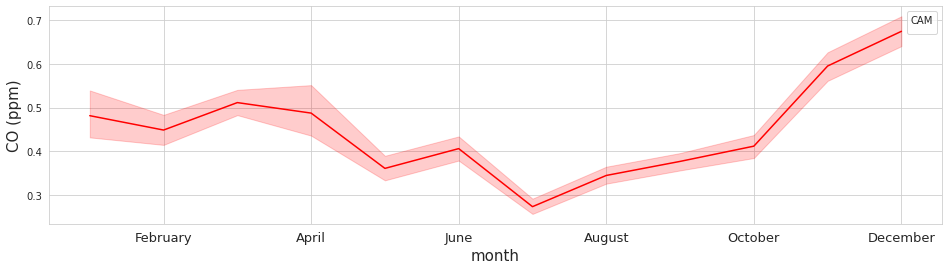

In [139]:
fig,axes = plt.subplots(figsize=(16,4)) #creating subplots, side by side
#fig.tight_layout(pad=-2) # makeing plots get closer
sns.set_style('whitegrid')
axes = sns.lineplot(data=CO_2018,x=CO_2018.index.month,y='CAM',color='red',
linewidth=1.5,palette="hls")
axes.set_xticklabels([0]+months[1::2], fontsize=13)
#axes.set_yticklabels(axes.get_yticks(), fontsize=13)
axes.set_xlabel('month', fontsize=15)
axes.set_ylabel('CO (ppm)', fontsize=15)
axes.legend().set_title('CAM')

/tmp/ipykernel_104248/3976558319.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticks(), fontsize=13)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


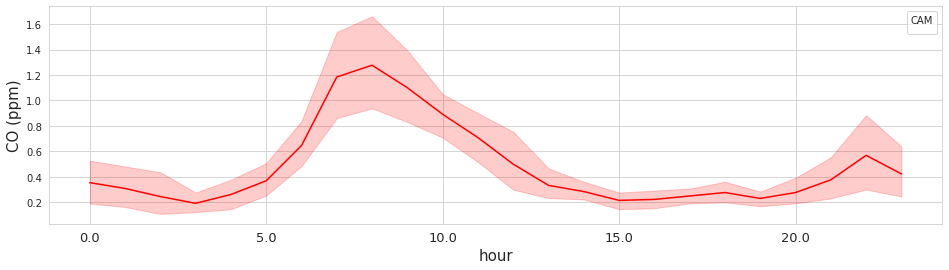

In [132]:
fig,axes = plt.subplots(figsize=(16,4)) #creating subplots, side by side
#fig.tight_layout(pad=-2) # makeing plots get closer
sns.set_style('whitegrid')
axes = sns.lineplot(data=enero,x=enero.index.hour,y='CAM',color='red',
linewidth=1.5,palette="hls")
axes.set_xticklabels(axes.get_xticks(), fontsize=13)
#axes.set_yticklabels(axes.get_yticks(), fontsize=13)
axes.set_xlabel('hour', fontsize=15)
axes.set_ylabel('CO (ppm)', fontsize=15)
axes.legend().set_title('CAM')

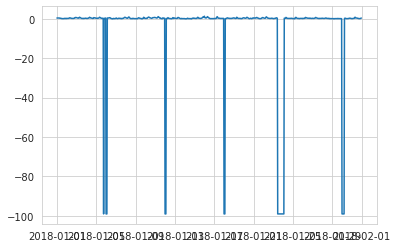

In [90]:
plt.plot(enero.index,enero.ACO)

In [13]:
prueba[prueba['ACO']==max(prueba['ACO'])].index.values

array(['2018-01-01T00:00:00.000000000', '2018-01-01T01:00:00.000000000',
       '2018-01-01T02:00:00.000000000', '2018-01-01T03:00:00.000000000',
       '2018-01-01T04:00:00.000000000', '2018-01-01T05:00:00.000000000',
       '2018-01-01T06:00:00.000000000'], dtype='datetime64[ns]')

# Pasos a realizar:

1. Crear una función que separe en distintos rangos de tiempo a la serie
2. Crear gráficas lineales en los distintos rangos de tiempo
3. Analizar el momento de máxima emisión del contaminante
4. Averiguar cómo poner esta información en un mapa de la cdmx

In [99]:
help(pd.DataFrame().dropna)

Help on method dropna in module pandas.core.frame:

dropna(axis: 'Axis' = 0, how: 'str' = 'any', thresh=None, subset=None, inplace: 'bool' = False) method of pandas.core.frame.DataFrame instance
    Remove missing values.
    
    See the :ref:`User Guide <missing_data>` for more on which values are
    considered missing, and how to work with missing data.
    
    Parameters
    ----------
    axis : {0 or 'index', 1 or 'columns'}, default 0
        Determine if rows or columns which contain missing values are
        removed.
    
        * 0, or 'index' : Drop rows which contain missing values.
        * 1, or 'columns' : Drop columns which contain missing value.
    
        .. versionchanged:: 1.0.0
    
           Pass tuple or list to drop on multiple axes.
           Only a single axis is allowed.
    
    how : {'any', 'all'}, default 'any'
        Determine if row or column is removed from DataFrame, when we have
        at least one NA or all NA.
    
        * 'any' : If a